In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/human-activity-recognition-with-smartphones/train.csv
/kaggle/input/human-activity-recognition-with-smartphones/test.csv


**Preparing data**

In [2]:
train = pd.read_csv('../input/human-activity-recognition-with-smartphones/train.csv')
train.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING


In [3]:
train.shape

(7352, 563)

In [4]:
train.isnull().values.any()

False

In [5]:
test = pd.read_csv('../input/human-activity-recognition-with-smartphones/test.csv')
test.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.257178,-0.023285,-0.014654,-0.938404,-0.920091,-0.667683,-0.952501,-0.925249,-0.674302,-0.894088,...,-0.705974,0.006462,0.162920,-0.825886,0.271151,-0.720009,0.276801,-0.057978,2,STANDING
1,0.286027,-0.013163,-0.119083,-0.975415,-0.967458,-0.944958,-0.986799,-0.968401,-0.945823,-0.894088,...,-0.594944,-0.083495,0.017500,-0.434375,0.920593,-0.698091,0.281343,-0.083898,2,STANDING
2,0.275485,-0.026050,-0.118152,-0.993819,-0.969926,-0.962748,-0.994403,-0.970735,-0.963483,-0.939260,...,-0.640736,-0.034956,0.202302,0.064103,0.145068,-0.702771,0.280083,-0.079346,2,STANDING
3,0.270298,-0.032614,-0.117520,-0.994743,-0.973268,-0.967091,-0.995274,-0.974471,-0.968897,-0.938610,...,-0.736124,-0.017067,0.154438,0.340134,0.296407,-0.698954,0.284114,-0.077108,2,STANDING
4,0.274833,-0.027848,-0.129527,-0.993852,-0.967445,-0.978295,-0.994111,-0.965953,-0.977346,-0.938610,...,-0.846595,-0.002223,-0.040046,0.736715,-0.118545,-0.692245,0.290722,-0.073857,2,STANDING


In [6]:
print(test.shape)
test.isnull().values.any()

(2947, 563)


False

In [7]:
X_train = train.iloc[:,:-2]
Y_train = train.iloc[:,-1]

print(X_train.shape)
print(Y_train.shape)

(7352, 561)
(7352,)


In [8]:
X_test = test.iloc[:,:-2]
Y_test = test.iloc[:,-1]

print(X_test.shape)
print(Y_test.shape)

(2947, 561)
(2947,)


In [9]:
Category_counts = np.array(Y_train.value_counts())
Category_counts

array([1407, 1374, 1286, 1226, 1073,  986])

**There are five different activities i.e 'Standing','Sitting','Laying','Walking','Walking_downstairs','Walking_upstairs'.**

**Plotting a count plot of each activity in the training data.**

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text major ticklabel objects>)

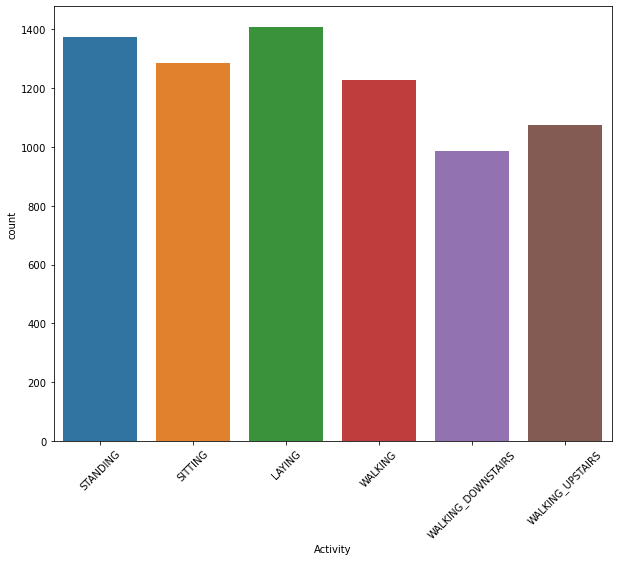

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,8))
sns.countplot(train.Activity)
plt.xticks(rotation=45)


**Creating a scatter plot using t-SNE**

Using t-SNE data can be visualized from a extremely high dimensional space to a low dimensional space and still it retains lots of actual information. Given training data has 562 unqiue features, using t-SNE let's visualize it to a 2D space.

In [11]:
from sklearn.manifold import TSNE
tsne = TSNE(random_state = 42, n_components=2, verbose=1, perplexity=50, n_iter=1000).fit_transform(X_train)

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.518s...
[t-SNE] Computed neighbors for 7352 samples in 44.519s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 1.437672
[t-SNE] KL divergence after 250 iterations with early exaggeration: 74.125961
[t-SNE] KL divergence after 1000 iterations: 1.282853


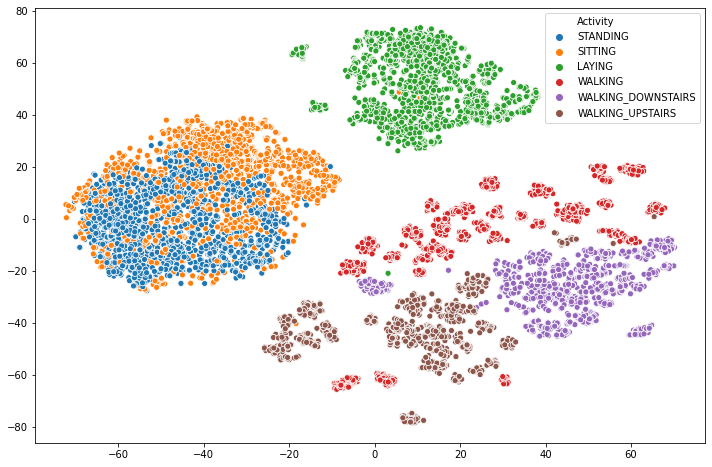

In [12]:
plt.figure(figsize=(12,8))
sns.scatterplot(x =tsne[:, 0], y = tsne[:, 1],data = train,hue = train["Activity"])


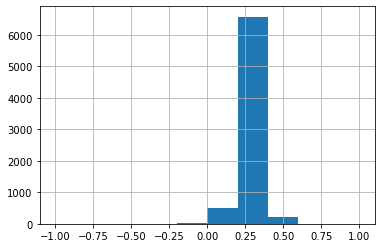

In [13]:
train['tBodyAcc-mean()-X'].hist()

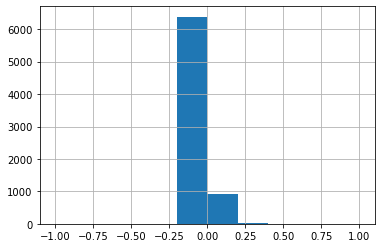

In [14]:
train['tBodyAcc-mean()-Y'].hist()

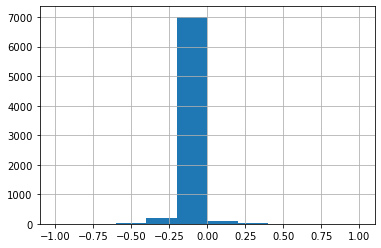

In [15]:
train['tBodyAcc-mean()-Z'].hist()

In [16]:
#Y_train = Y_train.reshape((-1,1))
#Y_test = Y_test.reshape((-1,1))

#print(Y_train.shape)
#print(Y_test.shape)

**Scaling the data**

   **Creating labels for different classes**

In [17]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

Y_train = le.fit_transform(Y_train)
Y_test = le.transform(Y_test)

le.classes_

array(['LAYING', 'SITTING', 'STANDING', 'WALKING', 'WALKING_DOWNSTAIRS',
       'WALKING_UPSTAIRS'], dtype=object)

**It is necessary to create a one-hot vector for classes to fit the data in the model.**

In [18]:
Y_train = pd.get_dummies(Y_train).values
Y_test = pd.get_dummies(Y_test).values

In [19]:
Y_train

array([[0, 0, 1, 0, 0, 0],
       [0, 0, 1, 0, 0, 0],
       [0, 0, 1, 0, 0, 0],
       ...,
       [0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 1]], dtype=uint8)

In [20]:
Y_train.shape



(7352, 6)

**Creating our model**

In [21]:
from tensorflow.keras import models
from tensorflow.keras.layers import Dense,Dropout

model = models.Sequential()

model.add(Dense(64,activation='relu',input_dim=X_train.shape[1]))
model.add(Dropout(0.25))
model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(10,activation='relu'))
model.add(Dense(6,activation='softmax'))

model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                35968     
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_3 (Dense)              (None, 32)                2080      
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 10)                3

**Compiling and training the model.**

In [22]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [23]:
hist = model.fit(X_train,Y_train,epochs=30,batch_size = 128,validation_split=0.3)

Epoch 1/30
41/41 [==============================] - 0s 9ms/step - loss: 1.3677 - accuracy: 0.4131 - val_loss: 0.8933 - val_accuracy: 0.6668
Epoch 2/30
41/41 [==============================] - 0s 4ms/step - loss: 0.7899 - accuracy: 0.6731 - val_loss: 0.5051 - val_accuracy: 0.8314
Epoch 3/30
41/41 [==============================] - 0s 4ms/step - loss: 0.5186 - accuracy: 0.7928 - val_loss: 0.3797 - val_accuracy: 0.8613
Epoch 4/30
41/41 [==============================] - 0s 4ms/step - loss: 0.3697 - accuracy: 0.8581 - val_loss: 0.3890 - val_accuracy: 0.8708
Epoch 5/30
41/41 [==============================] - 0s 4ms/step - loss: 0.2890 - accuracy: 0.8877 - val_loss: 0.2865 - val_accuracy: 0.9130
Epoch 6/30
41/41 [==============================] - 0s 4ms/step - loss: 0.2318 - accuracy: 0.9162 - val_loss: 0.2936 - val_accuracy: 0.8867
Epoch 7/30
41/41 [==============================] - 0s 4ms/step - loss: 0.2054 - accuracy: 0.9217 - val_loss: 0.2423 - val_accuracy: 0.9229
Epoch 8/30
41/41 [==

**Visualising loss and accuracy curve of the model.**

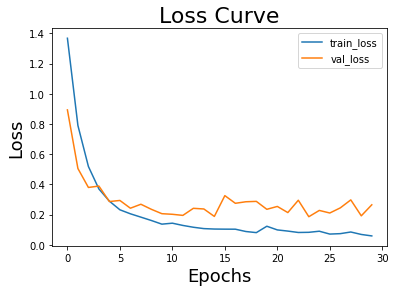

In [24]:
plt.plot(hist.history['loss'],label='train_loss')
plt.plot(hist.history['val_loss'],label='val_loss')
plt.xlabel('Epochs',fontsize=18)
plt.ylabel('Loss',fontsize=18)
plt.legend()
plt.title('Loss Curve',fontsize=22)
plt.show()

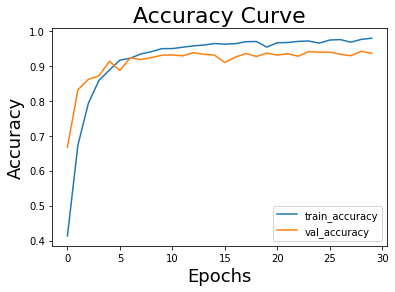

In [25]:
plt.plot(hist.history['accuracy'],label='train_accuracy')
plt.plot(hist.history['val_accuracy'],label='val_accuracy')
plt.xlabel('Epochs',fontsize=18)
plt.ylabel('Accuracy',fontsize=18)
plt.legend()
plt.title('Accuracy Curve',fontsize=22)
plt.show()

In [26]:
model.save('my_model.h5')

**Making predictions on test data**

In [27]:
predict = model.predict(X_test)

predictions = np.argmax(predict,axis=1)



In [28]:
predictions

array([2, 2, 2, ..., 5, 5, 3])

In [29]:
Y_test = np.argmax(Y_test,axis=1)

**Calculating accuracy**

Accuracy = 0.9216152019002375
Precision = 0.9282570445597496
Recall = 0.9216152019002375


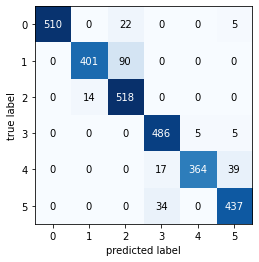

In [30]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

conf_matrix = confusion_matrix(Y_test,predictions)
plot_confusion_matrix(conf_matrix)

precision = precision_score(Y_test,predictions,average='weighted')
recall = recall_score(Y_test, predictions,average='weighted')
accuracy = accuracy_score(Y_test,predictions)

print("Accuracy = "+str(accuracy))
print("Precision = "+str(precision))
print("Recall = "+str(recall))

**The model was able to produce 93% accurate results.**